<a href="https://colab.research.google.com/github/Tisks/Covid-Big-Data/blob/master/Circular_plot_10_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Country/Region  8/9/20
0               US  162938
1           Brazil  101049
2           Mexico   52298
3   United Kingdom   46574
4            India   44386
5            Italy   35205
6           France   30202
7            Spain   28503
8             Peru   21072
9             Iran   18427
10           Chile   10077


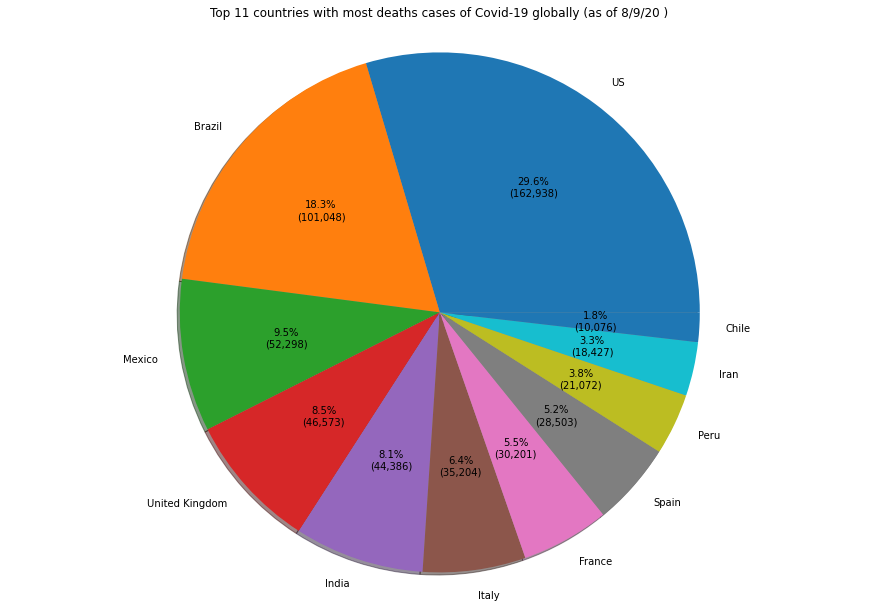

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

#importar el archivo
# agrupado_pais=df.groupby('Country/Region').sum()
# df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
# df0=df0.sort_values(by=dates[-1],ascending=Flase)

def addingChile(countryList, topTen):
  auxiliary = topTen
  for country in countryList.values:
    if country[0] == 'Chile':
      chileRow = pd.DataFrame({auxiliary.columns[0]:['Chile'], 
                          auxiliary.columns[1]:[country[1]]})
      auxiliary = auxiliary.append(chileRow,ignore_index = True)
  return auxiliary

def searchForChile(listToSearch):
  
  flag = False
  for country in listToSearch.values:
    if country[0] == 'Chile':
      flag = True
  if flag:
    return True
  else:
    return False

def preProcessing(dataframe,groupByColumns,columnsDropped,order,theFirst):
    #Agrupar paises
    agrupado_pais=dataframe.groupby(groupByColumns).sum()
    #limpiar columnas que no sirven
    df = dataframe.drop(columnsDropped, axis=1)
    dates=df.columns
    df0 = df.drop(columns=dates[1:-1], axis=1)
    #ordenar de mayor a menor por cantidad de contagiados
    sortedList=df0.sort_values(by=dates[-1],ascending=order)
    topTen=sortedList.head(theFirst)
    if not searchForChile(topTen):
      topTen = addingChile(sortedList,topTen)
    return topTen


def formatPercentage(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:,})".format(pct, absolute) 

def plotingChart(values,labels,title):
  # Plot
    plt.pie(values, labels=labels, autopct = lambda pct: formatPercentage(pct, values) , shadow=True, startangle=0,  radius=2)
    plt.title(title)
    plt.axis('equal')
    plt.subplots_adjust(1,1,3,3)
    plt.plot(figsize=(20,10))

def pieChartPlot(csvLink, columnsDropped, order, theFirst,groupByColumns,separator,title,topString):
    df=pd.read_csv(csvLink,sep=separator)
    readyDf = preProcessing(df,groupByColumns,columnsDropped,order,theFirst)
    print(readyDf)
    labels = []
    values=[]
    for country in readyDf.values:
      labels.append(country[0])
      values.append(country[1])
    if len(readyDf.values) == 10:
      plotingChart(values,labels,topString +' 10 ' + title + ' (as of '+readyDf.columns[1]+' )' )
    else:
      plotingChart(values,labels,topString + ' 11 ' + title + ' (as of '+readyDf.columns[1]+' )')

   

confirmedWorldWide_JHK = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deathsWorldWide_JHK= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recoveredWorldWide_JHK ='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'   

confirmedWorldWide_HUM='http://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv'
deathsWorldWide_HUM='http://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv'
recoveredWorldWide_HUM='http://data.humdata.org/hxlproxy/data/download/time_series_covid19_recovered_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv'


droppedColumns_JHK =['Province/State', 'Lat', 'Long']
groupByColumns_JHK = 'Country/Region'

droppedColumns_HUM = ['Province/State', 'Lat', 'Long','Intermediate Region Name','ISO 3166-1 Alpha 3-Codes','Region Code','Region Name','Sub-region Code','Sub-region Name','Intermediate Region Code']
groupByColumns_HUM = 'Country/Region'


separator = ','
topString = 'Top'
confirmedTitle = 'countries with the most confirmed cases of Covid-19 globally'
deathsTitle = 'countries with most deaths cases of Covid-19 globally'
recoveredTitle = 'countries with the most recovered cases of Covid-19 globally'


#pieChartPlot(confirmedWorldWide_JHK,droppedColumns_JHK,False, 10,groupByColumns_JHK,separator,confirmedTitle,topString)
#pieChartPlot(deathsWorldWide_JHK,droppedColumns_JHK,False, 10,groupByColumns_JHK,separator,deathsTitle,topString)
#pieChartPlot(recoveredWorldWide_JHK,droppedColumns_JHK,False, 10,groupByColumns_JHK,separator,recoveredTitle,topString)


#pieChartPlot(confirmedWorldWide_HUM,droppedColumns_HUM,False, 10,groupByColumns_HUM,separator,confirmedTitle,topString)
#pieChartPlot(deathsWorldWide_HUM,droppedColumns_HUM,False, 10,groupByColumns_HUM,separator,deathsTitle,topString)
#pieChartPlot(recoveredWorldWide_HUM,droppedColumns_HUM,False, 10,groupByColumns_HUM,separator,recoveredTitle,topString)